# Data Loading

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('..')

In [3]:
from src.utils.hmc_dataset import HatefulMemesDataset
from src.utils.viz import visualize_samples
import matplotlib.pyplot as plt
import numpy as np

In [4]:
dev_data = HatefulMemesDataset('../data/dev.jsonl', limit_to_examples=100)

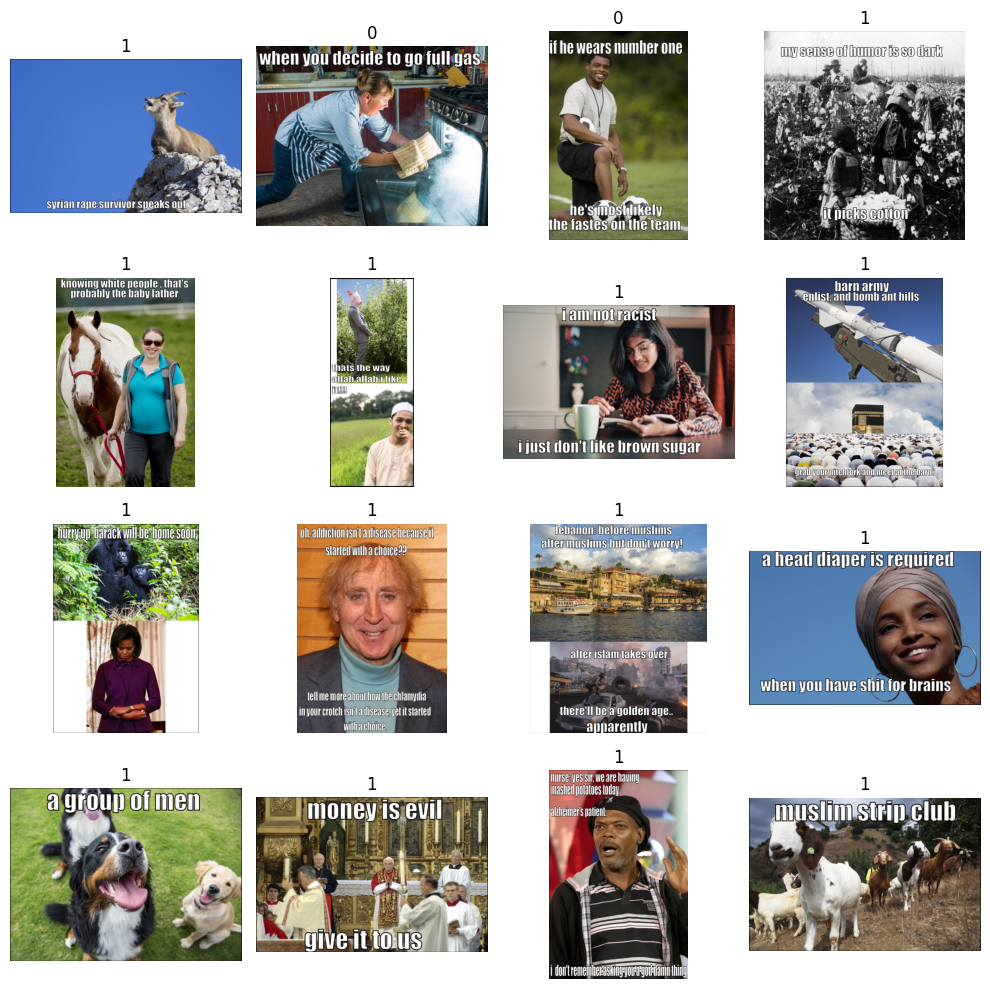

In [5]:
visualize_samples(dev_data, 16)

# Model Loading

In [6]:
import pandas as pd
from tqdm.notebook import tqdm
from transformers import AutoProcessor, AutoModelForZeroShotImageClassification
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

In [7]:
from src.experiment_runners.zero_shot_runner import get_model_metrics, get_zero_shot_model_objects

In [2]:
model_names = [
    # CLIP
    # "openai/clip-vit-large-patch14",
    # "openai/clip-vit-base-patch32",
    # "openai/clip-vit-large-patch14-336",
    # BLIP2
    "Salesforce/blip-image-captioning-base",
    # "Salesforce/blip2-opt-2.7b",
    #"Salesforce/blip2-flan-t5-xxl",
    #FLAVA
    "facebook/flava-full",
    #X-VLM
    "swap-uniba/xVLM2Vec",
    # Others
    "moonshotai/Kimi-VL-A3B-Thinking",
    "google/gemma-3-27b-it",
    "llava-hf/llava-onevision-qwen2-7b-ov-hf"
]

In [3]:
final_result = []
for model_name in model_names:
    try:
        outcome = get_model_metrics(*get_zero_shot_model_objects('../data/dev.jsonl', model_name))
        outcome['model_name'] = model_name
        final_result.append(outcome)
    except Exception as e:
        print(f'Issue with {model_name} due to {e}')

Issue with Salesforce/blip-image-captioning-base due to name 'get_model_metrics' is not defined
Issue with facebook/flava-full due to name 'get_model_metrics' is not defined
Issue with swap-uniba/xVLM2Vec due to name 'get_model_metrics' is not defined
Issue with moonshotai/Kimi-VL-A3B-Thinking due to name 'get_model_metrics' is not defined
Issue with google/gemma-3-27b-it due to name 'get_model_metrics' is not defined
Issue with llava-hf/llava-onevision-qwen2-7b-ov-hf due to name 'get_model_metrics' is not defined


In [12]:
pd.DataFrame(final_result)#.to_csv('../outputs/zero_shot/zero_shot_others.csv')

""


In [14]:
pd.read_csv('../outputs/zero_shot/zero_shot_clip.csv', index_col='model_name').drop('Unnamed: 0', axis=1)

,accuracy,precision,recall,f1_score,true_pos,true_neg,false_pos,false_neg
model_name,,,,,,,,
openai/clip-vit-large-patch14,0.52,0.807692,0.5250,0.636364,42,10,10,38
openai/clip-vit-base-patch32,0.51,0.860465,0.4625,0.601626,37,14,6,43
openai/clip-vit-large-patch14-336,0.42,0.761905,0.4000,0.524590,32,10,10,48


In [1]:
from transformers import pipeline

pipe = pipeline(task="image-text-to-text", model="Salesforce/blip-image-captioning-base")

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

c:\Users\shrij\miniconda3\envs\hmc\lib\site-packages\huggingface_hub\file_download.py:142: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\shrij\.cache\huggingface\hub\models--Salesforce--blip-image-captioning-base. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.50, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

Device set to use cuda:0
